## This notebook contains the code used to generate Figure 5C

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['pdf.fonttype'] = 42

### Setting a threshold for identifying DRNs in the diffBUM-HMM data

In [2]:
threshold = 0.95

### Loading big dataframe file:

In [3]:
data = pd.read_csv('../../../Data/New_data_table_Xist.txt',\
                    sep="\t",\
                    header=0,\
                    index_col=0)

### Masking data with insufficient coverage:

In [4]:
positionstomask = data[(data["SHAPE_reactivity_ex_vivo_1"] < -900) | 
                       (data["SHAPE_reactivity_ex_vivo_2"] < -900) |
                       (data["SHAPE_reactivity_in_cell_1"] < -900) | 
                       (data["SHAPE_reactivity_in_cell_2"] < -900)].index
print(len(positionstomask))
data.loc[positionstomask,data.columns[11:]] = np.nan

2517


In [5]:
data.head()

,nucleotide,CELF1,FUS,HuR,PTBP1,RBFOX2,TARDBP,SHAPE_reactivity_ex_vivo_1,SHAPE_reactivity_ex_vivo_2,SHAPE_reactivity_in_cell_1,...,dStruct_scaled,unmodified,ex_vivo,in_vivo,both,scaled_unmodified,scaled_ex_vivo,scaled_in_vivo,scaled_both,base_paired_to
1,C,0,0,0,0,0,0,-999.0,-999.0,-999.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,G,0,0,0,0,0,0,-999.0,-999.0,-999.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,G,0,0,0,0,0,0,-999.0,-999.0,-999.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C,0,0,0,0,0,0,-999.0,-999.0,-999.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,T,0,0,0,0,0,0,-999.0,-999.0,-999.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
proteins = ['CELF1','FUS', 'HuR', 'PTBP1', 'RBFOX2', 'TARDBP']
samples  = ['diffBUM_HMM_ex_vivo_norm','diffBUM_HMM_ex_vivo','diffBUM_HMM_in_vivo_norm','diffBUM_HMM_in_vivo',
            'deltaSHAPE_ex_vivo_1','deltaSHAPE_ex_vivo_2','deltaSHAPE_in_vivo_1','deltaSHAPE_in_vivo_2']

df = pd.DataFrame(0,index=proteins,columns=samples)

In [7]:
for protein in proteins:
    df.loc[protein,'diffBUM_HMM_ex_vivo_norm'] = data[data.scaled_ex_vivo >= threshold][protein].sum()
    df.loc[protein,'diffBUM_HMM_ex_vivo'] = data[data.ex_vivo >= threshold][protein].sum()
    df.loc[protein,'diffBUM_HMM_in_vivo_norm'] = data[data.scaled_in_vivo >= threshold][protein].sum()
    df.loc[protein,'diffBUM_HMM_in_vivo'] = data[data.in_vivo >= threshold][protein].sum()
    df.loc[protein,'deltaSHAPE_ex_vivo_1'] = data[data.deltaSHAPE_rep1 > 0][protein].sum()
    df.loc[protein,'deltaSHAPE_ex_vivo_2'] = data[data.deltaSHAPE_rep2 > 0][protein].sum()
    df.loc[protein,'deltaSHAPE_in_vivo_1'] = data[data.deltaSHAPE_rep1 < 0][protein].sum()
    df.loc[protein,'deltaSHAPE_in_vivo_2'] = data[data.deltaSHAPE_rep2 < 0][protein].sum()

In [8]:
df

,diffBUM_HMM_ex_vivo_norm,diffBUM_HMM_ex_vivo,diffBUM_HMM_in_vivo_norm,diffBUM_HMM_in_vivo,deltaSHAPE_ex_vivo_1,deltaSHAPE_ex_vivo_2,deltaSHAPE_in_vivo_1,deltaSHAPE_in_vivo_2
CELF1,67,36,10,11,69,54,16,10
FUS,396,271,44,35,70,133,98,120
HuR,111,61,18,15,131,75,16,19
PTBP1,66,28,7,7,74,50,11,9
RBFOX2,3,2,1,1,0,3,0,0
TARDBP,58,39,10,9,4,6,4,13


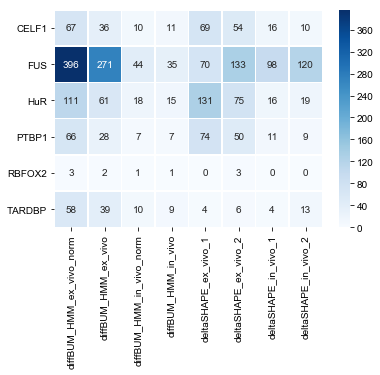

In [9]:
sns.heatmap(df,\
            cmap='Blues',\
            linewidths=.5,\
            annot=True,\
            fmt="d",\
            cbar_kws={'ticks': [0.0, 40, 80, 120, 160, 200, 240, 280, 320, 360, 400]})

plt.savefig("Figure_5C.pdf",dpi=400)